In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Fetching forecast data...

First 5 rows of the forecast data:
   Hour  Temperature_C  Energy_Price_USD
0     0          17.80               0.1
1     1          21.00               0.1
2     2          29.71               0.1
3     3          32.89               0.1
4     4          31.96               0.1


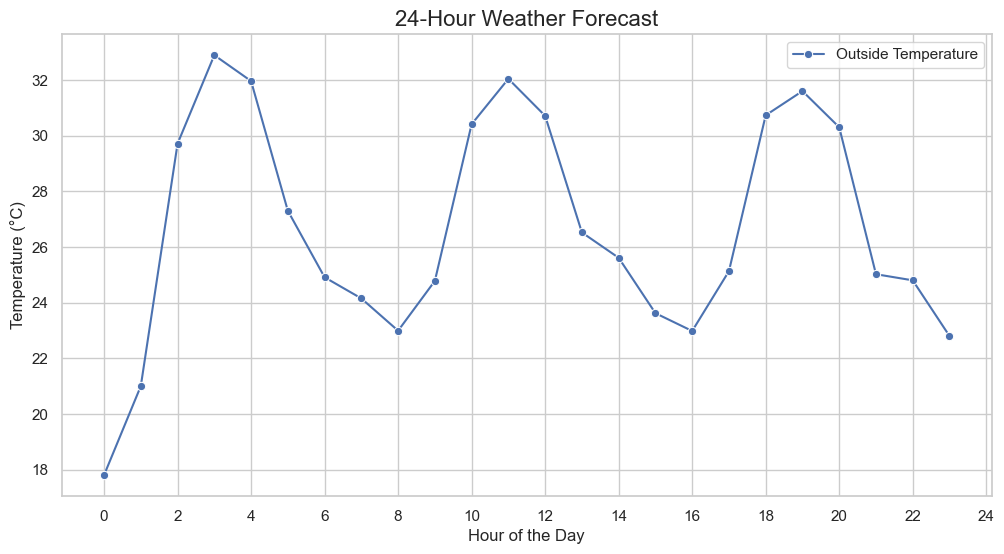

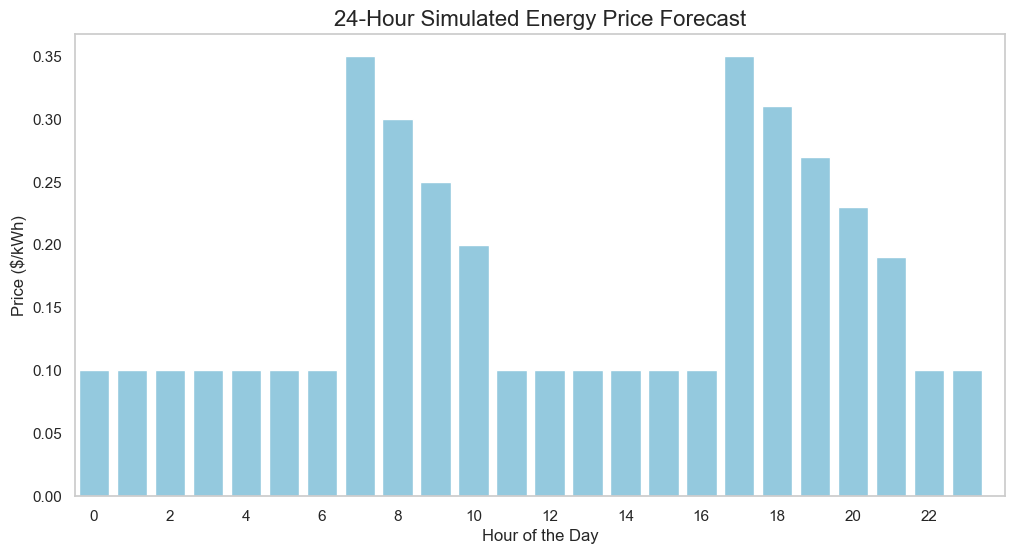

In [2]:
# In a Jupyter cell
# Import necessary libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project's root directory to the Python path
sys.path.append(os.path.abspath('..'))
from src.data_ingestion.api_clients import get_weather_forecast, get_simulated_energy_prices

# Set plot style
sns.set_theme(style="whitegrid")

# --- Cell 1: Fetch and Inspect the Data ---
print("Fetching forecast data...")
weather_forecast = get_weather_forecast()
price_forecast = get_simulated_energy_prices()

# Let's put this into a Pandas DataFrame for easy analysis and plotting
df = pd.DataFrame({
    'Hour': range(24),
    'Temperature_C': weather_forecast,
    'Energy_Price_USD': price_forecast
})

print("\nFirst 5 rows of the forecast data:")
print(df.head())


# --- Cell 2: Visualize the Weather Forecast ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Temperature_C', data=df, marker='o', label="Outside Temperature")
plt.title('24-Hour Weather Forecast', fontsize=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.xticks(range(0, 25, 2))
plt.grid(True)
plt.legend()
plt.show()

# --- OBSERVATIONS from this plot ---
# You can write notes here in a markdown cell.
# e.g., "The temperature follows a typical daily cycle, peaking in the afternoon."
# "This means the agent will need to cool more during hours 12-16."


# --- Cell 3: Visualize the Energy Price Forecast ---
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Energy_Price_USD', data=df, color='skyblue')
plt.title('24-Hour Simulated Energy Price Forecast', fontsize=16)
plt.xlabel('Hour of the Day')
plt.ylabel('Price ($/kWh)')
plt.xticks(range(0, 25, 2))
plt.grid(axis='y')
plt.show()

# --- OBSERVATIONS from this plot ---
# "There are clear morning and evening price peaks."
# "The agent should learn to pre-heat or pre-cool before these peaks to save money."
# "This validates that our simulated price data provides a good challenge for the RL agent."